# Handling Data over time

There's a widespread trend in solar physics at the moment for correlation over actual science, so being able to handle data over time spans is a skill we all need to have. Python has ample support for this so lets have a look at what we can use.


<section class="objectives panel panel-warning">
<div class="panel-heading">
<h2><span class="fa fa-certificate"></span> Learning Objectives</h2>
</div>


<div class="panel-body">

<ul>
<li>Understand and use Sunpy Time Series data.</li>
<li>Create a pandas dataframe.</li>
<li>Utilise the datetime package.</li>
<li>Use the pandas dataframe to plot the data within it.</li>
</ul>

</div>

</section>


## Sunpy Time Series

SunPy provides a timeseries object to handle this type of time series data. The module has a number of instruments associated with it, including:

* GOES XRS TimeSeries
* SDO EVE TimeSeries for level 0CS data
* Proba-2 LYRA TimeSeries
* NOAA Solar Cycle monthly indices.
* Nobeyama Radioheliograph Correlation TimeSeries.
* RHESSI X-ray Summary TimeSeries.

We're going to examine the data created by a solar flare on June 7th 2011.

Lets begin with the import statements:

In [1]:
import numpy as np
import sunpy
import sunpy.data.sample
import sunpy.timeseries as ts
import matplotlib.pyplot as plt
%matplotlib inline

Now lets look at some test series data, in this case we can utilitse the sunpy sample data. Do this with `import sunpy.data.sample`

In [2]:
goes_ts=ts.TimeSeries(sunpy.data.sample.GOES_XRS_TIMESERIES, source='XRS')

Now goes data is a sunpy time seris object so we can inspect the object

In [3]:
goes_ts.meta

|-------------------------------------------------------------------------------------------------|
|TimeRange                  | Columns         | Meta                                              |
|-------------------------------------------------------------------------------------------------|
|2011-06-06 23:59:59.961999 | xrsa            | simple: True                                      |
|            to             | xrsb            | bitpix: 8                                         |
|2011-06-07 23:59:57.631999 |                 | naxis: 0                                          |
|                           |                 | extend: True                                      |
|                           |                 | date: 26/06/2012                                  |
|                           |                 | numext: 3                                         |
|                           |                 | telescop: GOES 15                                 |


NB: not all sources provide meta data so this may be empty.

The actual data is accessible tthrough the attributes of the timeseries object. Part of the advantage of using these inbuilt functions we can get a quicklook at our data using short commands:

/Users/dannyhorta/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


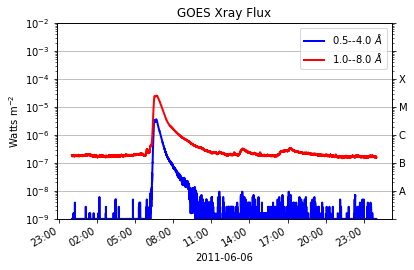

In [4]:
goes_ts.peek()

### Accessing and using the data

More custom plots can be made easily by accessing the data in the timeseries functionality. Both the time information and the data are contained within the timeseries.data code, which is a pandas dataframe. We can see what data is contained in the dataframe by finding which columns it contains and also asking what's in the meta data: 

In [5]:
goes_data=goes_ts.data
goes_data.columns

Index(['xrsa', 'xrsb'], dtype='object')


<section class="callout panel panel-warning">
<div class="panel-heading">
<h2><span class="fa fa-thumb-tack"></span> On Dictionaries</h2>
</div>


<div class="panel-body">

<p>We can create keyword-data pairs to form a dictionary (shock horror) of values. In this case we have defined some strings and number to represent temperatures across europe</p>
<div class="codehilite"><pre><span></span>temps = {&#39;Brussles&#39;: 9, &#39;London&#39;: 3, &#39;Barcelona&#39;: 13, &#39;Rome&#39;: 16}
temps[&#39;Rome&#39;]
16
</pre></div>


<p>We can also find out what keywords are associated with a given dictionary, In this case:</p>
<div class="codehilite"><pre><span></span>temps.keys()
dict_keys([&#39;London&#39;, &#39;Barcelona&#39;, &#39;Rome&#39;, &#39;Brussles&#39;])
</pre></div>


<p>Dictionaries will crop up more and more often, typically as a part of differnt file structure such as <code>ynl</code> and <code>json</code>.</p>

</div>

</section>


## Pandas

In its own words Pandas is a Python package providing fast, flexible, and expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive. Pandas has two forms of structures, 1D series and 2D dataframe. It also has its own functions associated with it.

It is also amazing.

Timeseries uses these in built Pandas functions, so we can find out things like the maximum of curves:


In [6]:
max_t_goes_long=goes_data['xrsb'].idxmax()
max_t_goes_short=goes_data.xrsa.idxmax()

print("GOES long index : {}".format(max_t_goes_long))
print("GOES short index : {}".format(max_t_goes_short))

GOES long index : 2011-06-07 06:41:24.118999
GOES short index : 2011-06-07 06:39:00.761999


In [7]:
type(goes_data)

pandas.core.frame.DataFrame

So lets plot them on the graph

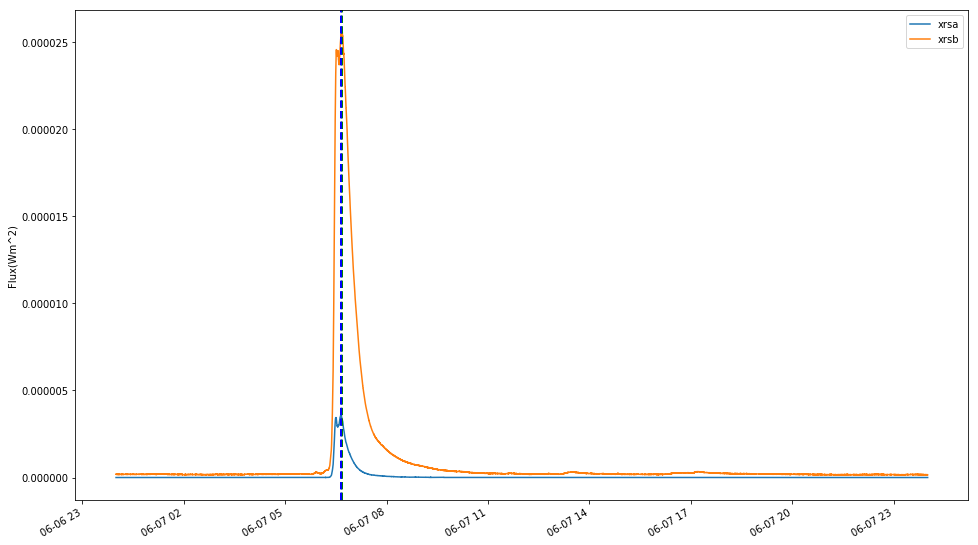

In [8]:
fig, ax=plt.subplots(figsize=(16,10))

goes_data.xrsa.plot(kind='line')
goes_data.xrsb.plot(kind='line')
plt.legend()
plt.ylabel("Flux(Wm^2)")

plt.axvline(max_t_goes_long, color='green',linestyle='dashed',linewidth=2)
plt.axvline(max_t_goes_short, color='blue',linestyle='dashed',linewidth=2)


## Reading in Tablulated data

Now we have seen a little of what Pandas can do, lets read in some of our own data. In this case we are going to use data from Bennett et al. 2015, ApJ, a truly ground breaking work. Now the data we are reading in here is a structured Array.


In [9]:
data= np.genfromtxt('data/macrospicules.csv',skip_header=1,dtype=None, delimiter=',')

/Users/dannyhorta/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  """Entry point for launching an IPython kernel.


Now, the above line imports information on some solar features over a sample time period. Specifically we have, maximum length, lifetime and time at which they occured. Now if we type `data[0]` what will happen?

In [10]:
data[0]

(27.02261709, 13.6, b'2010-06-01T13:00:14.120000')

This is the first row of the array, containing the first element of our three properties. This particular example is a stuctured array, so the columns and rows can have properties and assign properties to the header. We can ask what the title of these columns is by using a `dtype` command:

In [11]:
data.dtype.names

('f0', 'f1', 'f2')

Unhelpful, so lets give them something more recognisable. We can use the docs to look up syntax and change the names of the column lables.


<section class="callout panel panel-warning">
<div class="panel-heading">
<h2><span class="fa fa-thumb-tack"></span> Google your troubles away</h2>
</div>


<div class="panel-body">

<p>So the docs are <a href="http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.genfromtxt.html">here</a>. Find the syntax to change to names to better to represent maximum length, lifetime and point in time which they occured.</p>

</div>

</section>


In [12]:
data= np.genfromtxt('data/macrospicules.csv',skip_header=1,dtype=None, delimiter=',')

/Users/dannyhorta/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  """Entry point for launching an IPython kernel.


In [13]:
data.dtype.names=['Length','Lifetime','Point in time']

In [14]:
data.dtype.names

('Length', 'Lifetime', 'Point in time')

## DataFrame

Now a pandas DataFrame takes two arguments as a minimum, index and data. In this case the index will be our time within the sample and the maximum length and lifetime will be our data. So lets import pandas and use the dataframe:

Pandas reads a dictionary when we want to input multiple data columns. Therefore we need to make a dictionary of our data and read that into a pandas data frame. First we need to import pandas.


<section class="callout panel panel-warning">
<div class="panel-heading">
<h2><span class="fa fa-thumb-tack"></span> Dictionaries</h2>
</div>


<div class="panel-body">

<p>So we covered dictionaries earlier. We can create keyword data pairs to form a dictionary (shock horror) of values. In this case </p>
<div class="codehilite"><pre><span></span>temps = {&#39;Brussles&#39;: 9, &#39;London&#39;: 3, &#39;Barcelona&#39;: 13, &#39;Rome&#39;: 16}
temps[&#39;Rome&#39;]
16
</pre></div>


<p>We can also find out what keywords are associated with a given dictionary, In this case:</p>
<div class="codehilite"><pre><span></span>temps.keys()
dict_keys([&#39;London&#39;, &#39;Barcelona&#39;, &#39;Rome&#39;, &#39;Brussles&#39;])
</pre></div>

</div>

</section>


First, let's import Pandas:

In [15]:
import pandas as pd

adict = {'max_length':data['Length'],'lifetime':data['Lifetime']}

df=pd.DataFrame(data=adict,index=data['Point in time'])
print(df.head())

                               max_length   lifetime
b'2010-06-01T13:00:14.120000'   27.022617  13.600000
b'2010-06-01T12:58:02.120000'   36.208097   8.400000
b'2010-06-15T12:55:02.110000'   62.932898  24.199833
b'2010-07-07T12:23:50.110000'   38.970549  22.999667
b'2010-07-07T13:28:50.120000'   53.589420  21.799833


## Datetime Objects

Notice that the time for the sample is in a strange format. It is a string containing the date in YYYY-MM-DD and time in HH-MM-SS-mmmmmm. These datetime objects have their own set of methods associated with them. Python appreciates that these are built this way and can use them for the indexing easily. 

We can use this module to create date objects (representing just year, month, day). We can also get information about universal time, such as the time and date today.

NOTE: Datetime objects are NOT strings. They are objects which print out as strings.



In [16]:
import datetime
print(datetime.datetime.now())
print(datetime.datetime.utcnow())
lunchtime=datetime.time(12,30)
the_date=datetime.date(2018,2,13)
dinner=datetime.datetime.combine(the_date, lunchtime)
print(dinner)

2018-09-06 11:12:16.253102
2018-09-06 10:12:16.253468
2018-02-13 12:30:00


Looking back at when we discussed the first element of data, and the format of the time index was awkward to use so lets do something about that. 

In [17]:
print(df.index[0])

b'2010-06-01T13:00:14.120000'


So this is a byte rather than a string so we'll need to convert that using the string handling functionality in pandas

In [18]:
df['time']=df.index.astype(str)
df.iloc[0].time

'2010-06-01T13:00:14.120000'

This is a string and python will just treat it as such. We need to use datetime to pick this string appart and change it into an oject we can use.

[To the Docs!](https://docs.python.org/2/library/datetime.html#strftime-strptime-behavior)

So we use the formatting commands to match up with the string we have.

In [19]:
dt_obj=datetime.datetime.strptime(df.iloc[0].time,"%Y-%m-%dT%H:%M:%S.%f")

We can now get attributes from this such as the hour, month, second and so on

In [20]:
print(dt_obj.hour)
print(dt_obj.month)
print(dt_obj.day)

13
6
1


Now the next logical step would be to make a for loop and iterate over the index and reassign it.

*HOWEVER* there is almost always a better way. And Pandas has a `to_dateime()` method that we can feed the time columns:

In [21]:
df['datetime']=pd.to_datetime(df.time)
df.head()

,max_length,lifetime,time,datetime
b'2010-06-01T13:00:14.120000',27.022617,13.600000,2010-06-01T13:00:14.120000,2010-06-01 13:00:14.120
b'2010-06-01T12:58:02.120000',36.208097,8.400000,2010-06-01T12:58:02.120000,2010-06-01 12:58:02.120
b'2010-06-15T12:55:02.110000',62.932898,24.199833,2010-06-15T12:55:02.110000,2010-06-15 12:55:02.110
b'2010-07-07T12:23:50.110000',38.970549,22.999667,2010-07-07T12:23:50.110000,2010-07-07 12:23:50.110
b'2010-07-07T13:28:50.120000',53.589420,21.799833,2010-07-07T13:28:50.120000,2010-07-07 13:28:50.120


There is also one of the most powerful featues of python, Apply. 
Apply will take a function and apply it to all rows in a dataframe or column. The easiest way to do this is with a lambda function

In [22]:
df['other_datetime']=df.time.apply(lambda x: datetime.datetime.strptime(x,"%Y-%m-%dT%H:%M:%S.%f") )

In [23]:
df.head()

,max_length,lifetime,time,datetime,other_datetime
b'2010-06-01T13:00:14.120000',27.022617,13.600000,2010-06-01T13:00:14.120000,2010-06-01 13:00:14.120,2010-06-01 13:00:14.120
b'2010-06-01T12:58:02.120000',36.208097,8.400000,2010-06-01T12:58:02.120000,2010-06-01 12:58:02.120,2010-06-01 12:58:02.120
b'2010-06-15T12:55:02.110000',62.932898,24.199833,2010-06-15T12:55:02.110000,2010-06-15 12:55:02.110,2010-06-15 12:55:02.110
b'2010-07-07T12:23:50.110000',38.970549,22.999667,2010-07-07T12:23:50.110000,2010-07-07 12:23:50.110,2010-07-07 12:23:50.110
b'2010-07-07T13:28:50.120000',53.589420,21.799833,2010-07-07T13:28:50.120000,2010-07-07 13:28:50.120,2010-07-07 13:28:50.120


Both these are much cleaner and faster due to pandas' optimisation. We can now set one of these as the index

In [24]:
df.set_index('datetime',inplace=True)

Now that there are official datetime objects on the index we can start operating based on the time of the frame

In [25]:
l_bins = df.groupby([df.index.year, df.index.month])
len(l_bins)

54

Here we have used the groupby command to take the `'max_len'` column, called as a dictionary key, and create bins for our data to sit in according to year and then month. 

The object `l_bins` has `mean`, `max`, `std` etc. attributes in the same way as the numpy arrays we handled the other day.

In [27]:
agg_spicules = df.groupby([df.index.year, df.index.month]).agg({'max_length':[np.mean,np.std]})

ValueError: Duplicated level name: "datetime", assigned to level 1, is already used for level 0.

Now we have all this data we can build a lovely bargraph with error bars and wonderful things like that.

Remember, these pandas objects have functions associated with them, and one of them is a plot command.

Note that the date on the x-axis is a little messed up we can fix with `fig.autofmt_xdate()`




<section class="challenge panel panel-success">
<div class="panel-heading">
<h2><span class="fa fa-pencil"></span> How do the lifetimes change?</h2>
</div>


<div class="panel-body">

<p>Now that we have the plot for the maximum length, now make a bar graph of the lifetimes of the features.</p>

</div>

</section>



<section class="challenge panel panel-success">
<div class="panel-heading">
<h2><span class="fa fa-pencil"></span> Exoplanet Data</h2>
</div>


<div class="panel-body">

<p>Now, to all the astronomers out there, let us process some real data. We have some txt files containing the timeseries data from a recent paper. Can you process the data and show us the planet?</p>
<p>HINT: You'll need to treat this data slightly differently. The date here is in Julian Day so you will need to use <a href="http://docs.astropy.org/en/v1.1.1/api/astropy.time.Time.html">these</a> docs to convert it to a sensible datetime object, before you make the DataFrame.</p>

</div>

</section>
